# The `intrinsic` module of the `cascapy` package

Import module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cascapy.constants import *
from cascapy.intrinsic import *

# The `TimeModel` class
Plot the time model integrated in an observation window of 10s, as a function of the observation start time

### PulseTimeModel()
Here are a few checks of the class

In [2]:
Tmodel = PulseTimeModel()
print("f(0) = ",Tmodel.f(0.))
print("f(1) = ",Tmodel.f(1.))
print("fint(0,0) = ",Tmodel.fint(0.,0.))
print("fint(-1,1) = ",Tmodel.fint(-1,1))
print("fint(1,2) = ",Tmodel.fint(1,2))

f(0) =  1.0
f(1) =  0.0
fint(0,0) =  1.0
fint(-1,1) =  1.0
fint(1,2) =  0.0


### PowerlawTimeModel()
Here are a few checks of the class

In [3]:
# A first model
Tmodel = PowerLawTimeModel(alpha=1.5,tmin=15,tmax=1.e4)
Tmodel.info()
print("f(1)      = ",Tmodel.f(20))
print("fint(1,2) = ",Tmodel.fint(20,30))
print("fave(1,2) = ",Tmodel.fave(20,30))

   Time model:
   Ttype           =       PL
   alpha           =      1.5
   tmin            =       15
   tmax            =  10000.0
f(1)      =  0.011180339887498949
fint(1,2) =  0.08206522382984721
fave(1,2) =  0.008206522382984721


Change a parameter value

In [4]:
# Change a model parameter
Tmodel.update({'alpha':1.2})
Tmodel.info()
print("f(1)      = ",Tmodel.f(20))

   Time model:
   Ttype           =       PL
   alpha           =      1.2
   tmin            =       15
   tmax            =  10000.0
f(1)      =  0.02746401358265295


Here is an example to plus the flux integrated in a moving time window of 10s

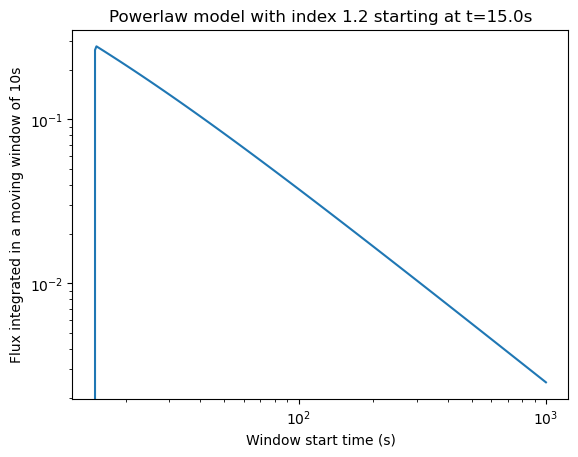

In [5]:
Tmodel = PowerLawTimeModel(alpha=1.2,tmin=15,tmax=1.e4)
t = np.logspace(0,3,100)
plt.loglog(t,Tmodel.fint(t,t+10))
plt.xlabel("Window start time (s)")
plt.ylabel("Flux integrated in a moving window of 10s")
plt.title(f"Powerlaw model with index {Tmodel.params['alpha']:.1f} starting at t={Tmodel.params['tmin']:.1f}s")
plt.show()

### Adding a new TimeModel
The following derived class defines a time model with f(t) = A + 1/t^1, where A is the only model parameter

In [6]:
class MyTimeModel(TimeModel):

    def __init__(self,A=0.0):
        TimeModel.__init__(self)
        self.params.update({'Ttype':'mymodel','A':A})
    
    def f(self,t):
        return self.params['A'] + 1.0/t**2
    
    def fint(self,t1i,t2i):
        t1 = np.array(t1i,copy=True,dtype=float,ndmin=1)
        t2 = np.array(t2i,copy=True,dtype=float,ndmin=1)
        F = np.zeros_like(t1)
        ind = (t2>t1)
        F[ind] = self.params['A']*(t2[ind]-t1[ind]) - (1.0/t2[ind]-1.0/t1[ind])
        return np.squeeze(F)[()]


In [7]:
Tmodel = MyTimeModel(A=3)
Tmodel.info()
print("f(1)      = ",Tmodel.f(1))
print("fint(1,2) = ",Tmodel.fint(1,2))
print("fave(1,2) = ",Tmodel.fave(1,2))


   Time model:
   Ttype           =  mymodel
   A               =        3
f(1)      =  4.0
fint(1,2) =  3.5
fave(1,2) =  3.5


### Use a template time model
Template time model are models interpolated from a tabulated flux

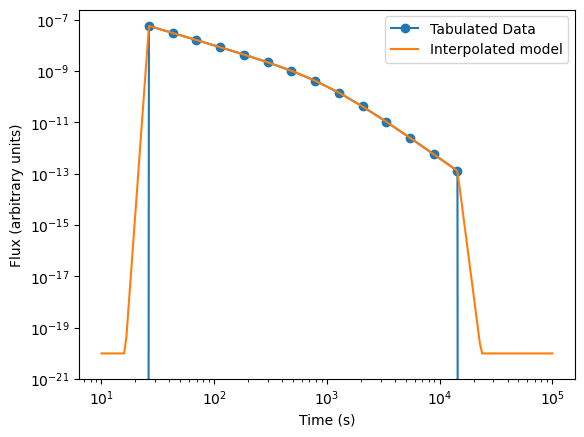

In [8]:
# Define arrays of time and fluxes
def f(t):
    g1, g2, tc, tmin, tmax = 1.3, 3.1, 1.e3, 20., 2.e4
    return ((t > tmin) & (t < tmax)) * t ** (-g1) / (tc ** (g2 - g1) + t ** (g2 - g1))
t = np.logspace(np.log10(10), np.log10(1.e5), 20)
fluxes = f(t)
plt.plot(t, fluxes, marker='o', label='Tabulated Data')

# Define template model
tmodel = TemplateTimeModel(t, fluxes,fmin=1.e-20,logt=True)
                           
# Plot template model
tt = np.logspace(np.log10(10.), np.log10(1.e5), 200)
plt.plot(tt, tmodel.f(tt), label='Interpolated model')

# setup plot layout                           
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e-21, )
plt.xlabel('Time (s)')
plt.ylabel('Flux (arbitrary units)')
plt.legend()
plt.show()

# The `SpectralModel` class

### The PowerLawSpectralModel() class
Create a powerlaw model:

In [11]:
Emodel = PowerLawSpectralModel(z=0.42,gamma=1.5,emin=10*GeV,emax=10*TeV)
Emodel.info()

   Spectral model:
   Etype           =       PL
   z               =     0.42
   Gamma           =      1.5
   Emin            = 0.01602176634
   Emax            = 16.02176634
   Epiv            = 1.6021766339999999


Print flux integrated in the 100GeV,3*TeV band

In [12]:
print("Unabsorbed flux:",Emodel.fint(100*GeV,3*TeV,absorbed=False))
print("Absorbed flux:  ",Emodel.fint(100*GeV,3*TeV,absorbed=True))

Unabsorbed flux: 4.536797190106976
Absorbed flux:   0.49201365972410704


Print flux integrated in the 100GeV,3*TeV band

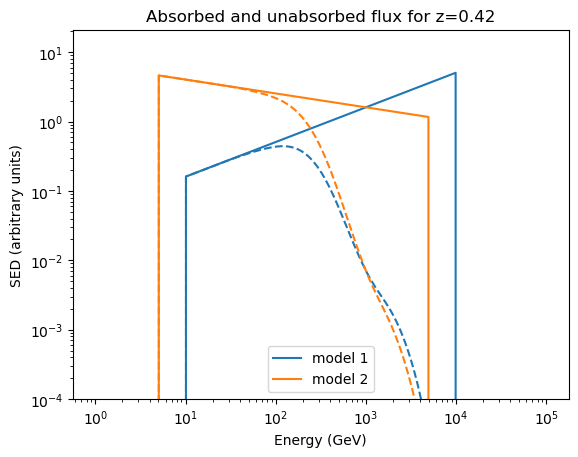

In [14]:
E = np.logspace(np.log10(1*GeV),np.log10(100*TeV),200)

# Model 1
Emodel = PowerLawSpectralModel(z=0.42,gamma=1.5,emin=10*GeV,emax=10*TeV)
l, = plt.loglog(E/GeV,E*Emodel.f(E),label='model 1')
plt.loglog(E/GeV,E*Emodel.f(E,absorbed=True),'--',color=l.get_color())

# Model2
Emodel.update({'Gamma':2.2,'Emin':5*GeV,'Emax':5*TeV})
l,= plt.loglog(E/GeV,E*Emodel.f(E),label='model 2')
plt.loglog(E/GeV,E*Emodel.f(E,absorbed=True),'--',color=l.get_color())

plt.xlabel('Energy (GeV)')
plt.ylabel('SED (arbitrary units)')
plt.ylim(1.e-4,)
plt.legend()
plt.title(f"Absorbed and unabsorbed flux for z={Emodel.params['z']}")
plt.show()

### The CutoffPowerLawModel() class
Define model: 

In [16]:
model = CutoffPowerLawSpectralModel(gamma=1.9,emax=15*TeV,z=0.2)
model.info()

   Spectral model:
   Etype           =       PL
   z               =      0.2
   Gamma           =      1.9
   Emin            = 1.602176634e-06
   Emax            = 24.03264951
   Epiv            = 1.6021766339999999
   q               =        1


Plot the spectral model flux (absorbed and unabsorbed) for different rollover indices

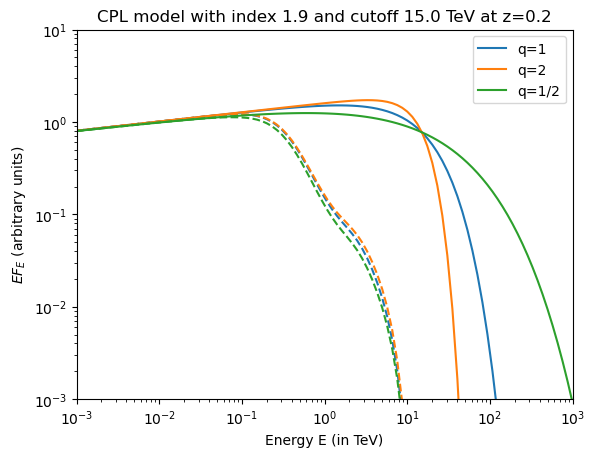

In [17]:
E = np.logspace(np.log10(1*GeV),np.log10(1000*TeV),100)

# Model 1
l,=plt.loglog(E/TeV,E*model.f(E),label='q=1')
l,=plt.loglog(E/TeV,E*model.f(E,absorbed=True),'--',color=l.get_color())

# Model 2
model.update({'q':2})
l,=plt.loglog(E/TeV,E*model.f(E),label='q=2')
l,=plt.loglog(E/TeV,E*model.f(E,absorbed=True),'--',color=l.get_color())

# Model 3
model.update({'q':0.5})
l,=plt.loglog(E/TeV,E*model.f(E),label='q=1/2')
l,=plt.loglog(E/TeV,E*model.f(E,absorbed=True),'--',color=l.get_color())

plt.legend()
plt.xlim(1.e-3,1.e3)
plt.ylim(1.e-3,1.e1)
plt.xlabel('Energy E (in TeV)')
plt.ylabel(r'$E F_E$ (arbitrary units)')
plt.title(f"CPL model with index {model.params['Gamma']:.1f} and cutoff {model.params['Emax']/TeV:.1f} TeV at z={model.params['z']:.1f}")
plt.show()

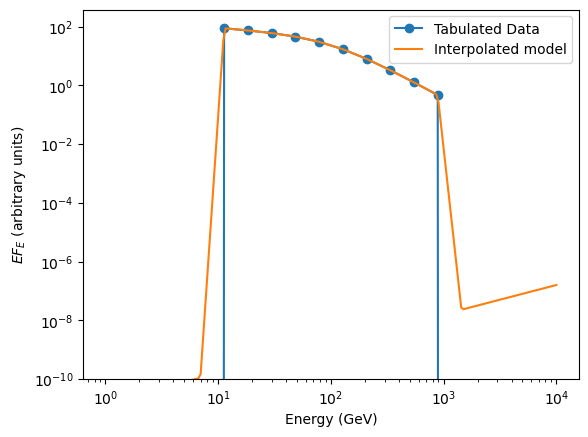

In [19]:
# Define a grid of energies and fluxes
def f(e):
    g1, g2, ec, emin, emax = 1.3, 3.1, 100 * GeV, 10 * GeV, 1 * TeV
    return ((e > emin) & (e < emax)) * e ** (-g1) / (ec ** (g2 - g1) + e ** (g2 - g1))
e = np.logspace(np.log10(1 * GeV), np.log10(10 * TeV), 20)
fluxes =  f(e)
plt.plot(e / GeV, e*fluxes, marker='o', label='Tabulated Data')

# Define template model
tmodel = TemplateSpectralModel(e, fluxes, fmin=1.e-8)

# Plot template model
ee = np.logspace(np.log10(1 * GeV), np.log10(10 * TeV), 200)
plt.plot(ee / GeV, ee*tmodel.f(ee), label='Interpolated model')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e-10, )
plt.xlabel('Energy (GeV)')
plt.ylabel(r'$E F_E$ (arbitrary units)')
plt.legend()
plt.show()

# The `AngularModel` class
Define model and get information about it

In [20]:
model1 = IsotropicAngularModel()
print('Model1:')
model1.info()

model2 = DiskAngularModel(th_jet=20*degree,th_obs=10*degree)
print('Model2:')
model2.info()

Model1:
   Angular model:
   Atype           =      Iso
   th_obs          =      0.0
Model2:
   Angular model:
   Atype           =     Disk
   th_obs          = 0.17453292519943295
   th_jet          = 0.3490658503988659


Plot the angular distribution of the two models

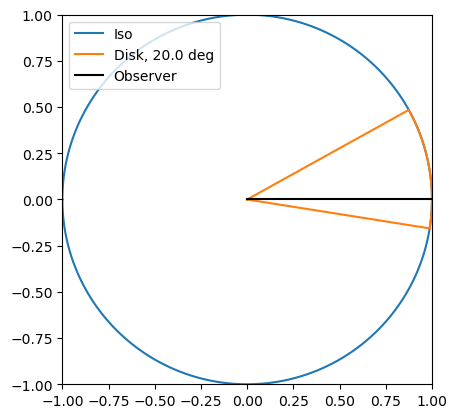

In [22]:
theta = np.linspace(-np.pi,np.pi,200)

r = model1.dndwe(theta)
plt.plot(r*np.cos(theta),r*np.sin(theta),label='Iso')

r = model2.dndwe(theta)
plt.plot(r*np.cos(model2.params['th_obs']+theta),r*np.sin(model2.params['th_obs']+theta),
         label=f"Disk, {model2.params['th_jet']/degree} deg")

plt.plot([0,1],[0,0],color='k',label='Observer')
plt.gca().set_aspect('equal')
plt.legend(loc='upper left')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

# The `SourceModel` class
Compare the reference PL model of GRB190114C with a Log-parabola model
- Define a model corresponding to reference source GRB190114C.

In [23]:
model1 = GRB190114C
model1.info()

ENERGY SPECTRUM:
   Spectral model:
   Etype           =       PL
   z               =   0.4245
   Gamma           =     2.22
   Emin            = 1.602176634e-05
   Emax            = 16.02176634
   Epiv            = 1.6021766339999999
TIME EVOLUTION:
   Time model:
   Ttype           =       PL
   alpha           =      1.6
   tmin            =        6
   tmax            =    1e+20
ANGULAR DISTRIBUTION:
   Angular model:
   Atype           =      Iso
   th_obs          =      0.0
POINT SOURCE NORMALIZATION:
   norm  = 3.07e-05


- Build an unnomalized alternative model with a LogParabola spectrum

In [26]:
emodel = LogParabolaSpectralModel(gamma=2.51,eta=0.21*0.4342,epiv=0.4*TeV,emin=10*MeV,emax=10*TeV,z=0.4245)
tmodel = PowerLawTimeModel(alpha=1.6,tmin=6)
model2 = SourceModel(tmodel,emodel)

- Normalized this second model to the fluence measured in the 62-2454s observation window and in the 0.3-1 TeV energy range. Disply model information.

In [28]:
from cascapy.cosmo import LCDM
z = Emodel.params['z']
Dl = LCDM().dc_z(z)*(1+z)
model2.norm = 4e51*(1+0.4245)/(4*np.pi*Dl**2)/model2.f(62.,2454,0.3*TeV,1*TeV)
model2.info()

ENERGY SPECTRUM:
   Spectral model:
   Etype           =       PL
   z               =   0.4245
   Gamma           =     2.51
   Emin            = 1.602176634e-05
   Emax            = 16.02176634
   Epiv            = 0.6408706536
   eta             = 0.09118199999999999
TIME EVOLUTION:
   Time model:
   Ttype           =       PL
   alpha           =      1.6
   tmin            =        6
   tmax            =    1e+20
ANGULAR DISTRIBUTION:
   Angular model:
   Atype           =      Iso
   th_obs          =      0.0
POINT SOURCE NORMALIZATION:
   norm  = 1.04e-04


- Plot the two model spectra at t=1000s

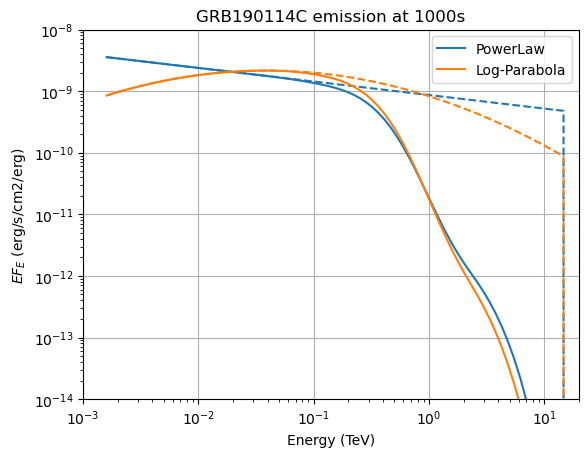

In [30]:
E = np.logspace(np.log10(1*GeV),np.log10(200*TeV),100)
t = 1000.

plt.loglog(E,E*model1.fet(E,t,absorbed=True),color='#1f77b4',label='PowerLaw')
plt.loglog(E,E*model1.fet(E,t,absorbed=False),ls='--',color='#1f77b4')

plt.loglog(E,E*model2.fet(E,t,absorbed=True),color='#ff7f0e',label='Log-Parabola')
plt.loglog(E,E*model2.fet(E,t,absorbed=False),ls='--',color='#ff7f0e')

plt.ylabel(r"$EF_E$ (erg/s/cm2/erg)")
plt.xlabel("Energy (TeV)")
plt.xlim(1.e-3,2.e1)
plt.ylim(1.e-14,1.e-8)
plt.title('GRB190114C emission at 1000s')
plt.legend()
plt.grid()
plt.show()

# The `NonSeparableSourceModel` class
The `NonSeparableSourceModel` class allows to define a spectro-temporal model where energy and time are not separable. In the current version, only tabulated models can be defined.

the following cells build a such source model from energy, time, and flux grids and plot the predicted instantaneous spectrum. 

Actually, the array data used to build this model are here defined from a separable model in time and energy for check purposes. And both models yield similar results.

However, any flux(energy,time) can be provided.

In [4]:
# generic model properties
emin, emax = 0.1 * GeV, 15 * TeV
tmin, tmax = 13., 10 * day
z = 0.42

Build model with separable time and energy

In [5]:
emodel = LogParabolaSpectralModel(emin=emin, emax=emax, z=z)
tmodel = LogParabolaTimeModel(tmin=tmin, tmax=tmax)
model1 = SourceModel(emodel=emodel, tmodel=tmodel)

Set up grids that will build the `NonSeperatedSourceModel`

In [7]:
egrid = np.logspace(np.log10(0.05 * GeV), np.log10(20 * TeV), 23)
tgrid = np.logspace(np.log10(10.), np.log10(20 * day), 21)
flux = np.zeros((len(egrid), len(tgrid)))
for it, t in enumerate(tgrid):
    flux[:, it] = model.fet(egrid, t)

Build `NonSeperatedSourceModel`

In [8]:
model2 = NonSeparableSourceModel(egrid, tgrid, flux, z=z)

Plot and compare results

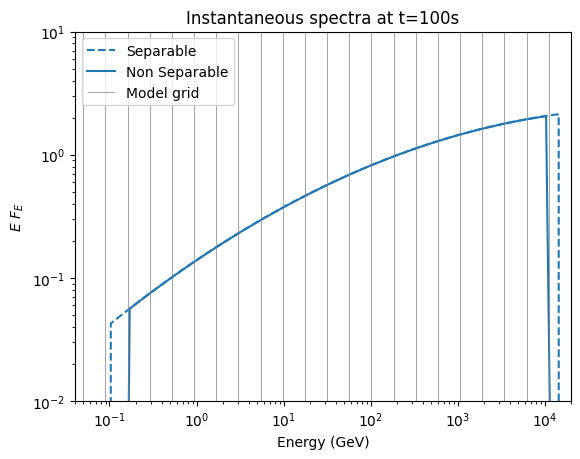

In [9]:
e = np.logspace(np.log10(emin / 10), np.log10(emax * 10), 100)
t = 100

pp = plt.loglog(e / GeV, model.efet(e, t, absorbed=False), ls='--', label='Separable')
col = pp[0].get_color()
plt.loglog(e / GeV, model2.efet(e, t, absorbed=False), color=col, label='Non Separable')
plt.vlines(egrid / GeV, 1.e-2, 1.e1, color='grey', lw=0.5, label='Model grid')

plt.xlabel(r"Energy (GeV)")
plt.ylabel(r"$E\ F_E$")
plt.ylim(1.e-2, 1.e1)
plt.xlim(4.e-2, 2.e4)
plt.title(f"Instantaneous spectra at t={t}s")
plt.legend(loc='upper left')
plt.show()

The observed shift in maximal and minimal energies is due to the sparce binning used
    to define the model. This can be removed by a denser binning or more appropriate to
    the model boundaries.